<a href="https://colab.research.google.com/github/ghizlane89/0__GenIA/blob/Bootcamp/W3_D3_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Monter Google Drive pour accéder au fichier
from google.colab import drive
drive.mount('/content/drive')

# Importer les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


encoding='latin1'
# Charger le fichier CSV
file_path = '/content/drive/My Drive/Datasets/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv'
df = pd.read_csv(file_path,encoding='latin1')

# Afficher les premières lignes du fichier
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [5]:
# Étape 2 : Nettoyage et préparation des données

# Afficher les informations générales du dataframe
df.info()

# Convertir la colonne 'Date' au format datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Supprimer les lignes sans date (car inutilisables pour l’analyse temporelle)
df = df.dropna(subset=['Date'])

# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Remplacer les valeurs manquantes dans les colonnes critiques
df['Fatalities'] = df['Fatalities'].fillna(0)  # On considère 0 mort quand l'info est absente
df['Aboard'] = df['Aboard'].fillna(df['Fatalities'])  # Hypothèse : à défaut, même valeur que Fatalities
df['Ground'] = df['Ground'].fillna(0)  # 0 morts au sol si non précisé

# Créer une nouvelle colonne : nombre de survivants
df['Survivors'] = df['Aboard'] - df['Fatalities']

# Créer une colonne pour l'année, utile pour les analyses temporelles
df['Year'] = df['Date'].dt.year



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4998 non-null   datetime64[ns]
 1   Time                   3486 non-null   object        
 2   Location               4994 non-null   object        
 3   Operator               4988 non-null   object        
 4   Flight #               1329 non-null   object        
 5   Route                  4221 non-null   object        
 6   AC Type                4983 non-null   object        
 7   Registration           4724 non-null   object        
 8   cn/ln                  4330 non-null   object        
 9   Aboard                 4998 non-null   float64       
 10  Aboard Passangers      4769 non-null   float64       
 11  Aboard Crew            4772 non-null   float64       
 12  Fatalities             4998 non-null   float64       
 13  Fat

In [6]:
# Nombre total de crashs
total_crashes = len(df)

# Nombre total de morts
total_fatalities = df['Fatalities'].sum()

# Taux de survie moyen
average_survival_rate = (df['Survivors'].sum() / df['Aboard'].sum()) * 100

print(f"Nombre total de crashs : {total_crashes}")
print(f"Nombre total de morts : {total_fatalities}")
print(f"Taux de survie moyen : {average_survival_rate:.2f}%")

# Nombre de crashs par année
df['Year'] = df['Date'].dt.year
crashes_per_year = df.groupby('Year').size()

# Affichage
crashes_per_year.tail()


Nombre total de crashs : 4998
Nombre total de morts : 111644.0
Taux de survie moyen : 28.18%


,0
Year,
2019,13
2020,8
2021,9
2022,6
2023,4


In [7]:
#Étape 3 : Analyse exploratoire

# Moyenne, médiane, écart-type des décès
mean_fatalities = df['Fatalities'].mean()
median_fatalities = df['Fatalities'].median()
std_fatalities = df['Fatalities'].std()

print("Moyenne des décès :", mean_fatalities)
print("Médiane des décès :", median_fatalities)
print("Écart-type des décès :", std_fatalities)

# Comparaison des décès entre les années avant 2000 et après 2000
before_2000 = df[df['Year'] < 2000]['Fatalities']
after_2000 = df[df['Year'] >= 2000]['Fatalities']

t_stat, p_val = stats.ttest_ind(before_2000, after_2000, equal_var=False)
print(f"Test t entre avant et après 2000 : T = {t_stat:.2f}, p = {p_val:.4f}")


Moyenne des décès : 22.337735094037615
Médiane des décès : 11.0
Écart-type des décès : 35.04508061393761
Test t entre avant et après 2000 : T = -1.22, p = 0.2236


In [10]:
# Étape 4 : Analyse statistique avec SciPy

# Moyenne, médiane, écart-type des décès
mean_fatalities = df['Fatalities'].mean()
median_fatalities = df['Fatalities'].median()
std_fatalities = df['Fatalities'].std()

print("Moyenne des décès :", mean_fatalities)
print("Médiane des décès :", median_fatalities)
print("Écart-type des décès :", std_fatalities)

# Comparaison des décès entre les années avant 2000 et après 2000
before_2000 = df[df['Year'] < 2000]['Fatalities']
after_2000 = df[df['Year'] >= 2000]['Fatalities']

t_stat, p_val = stats.ttest_ind(before_2000, after_2000, equal_var=False)
print(f"Test t entre avant et après 2000 : T = {t_stat:.2f}, p = {p_val:.4f}")



Moyenne des décès : 22.337735094037615
Médiane des décès : 11.0
Écart-type des décès : 35.04508061393761
Test t entre avant et après 2000 : T = -1.22, p = 0.2236


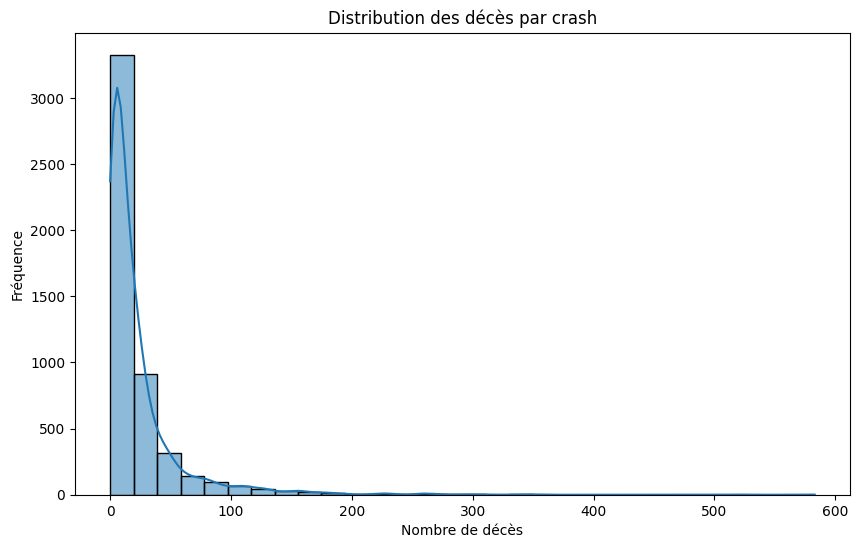

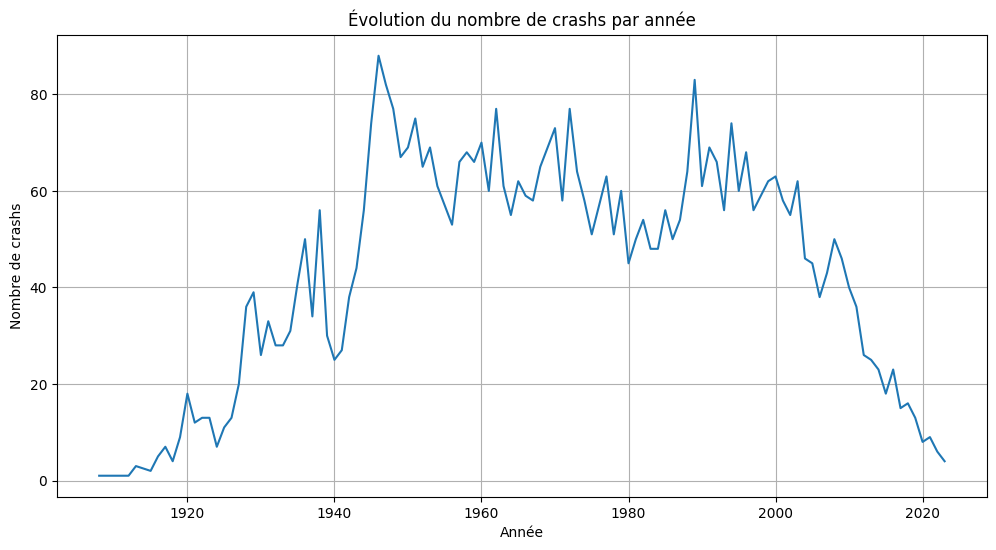

In [9]:
 #Étape 5 : Visualisation des résultats


 # Histogramme des décès
plt.figure(figsize=(10, 6))
sns.histplot(df['Fatalities'], bins=30, kde=True)
plt.title('Distribution des décès par crash')
plt.xlabel('Nombre de décès')
plt.ylabel('Fréquence')
plt.show()

# Nombre de crashs par année
plt.figure(figsize=(12, 6))
crashes_per_year.plot()
plt.title("Évolution du nombre de crashs par année")
plt.xlabel("Année")
plt.ylabel("Nombre de crashs")
plt.grid(True)
plt.show()


In [11]:
#  Étape 6 : Conclusion / Rapport final

# Exemple d'interprétation
print("📌 Analyse finale :")
print(f"Le dataset couvre {df['Year'].min()} à {df['Year'].max()} avec un total de {total_crashes} crashs.")
print(f"La moyenne des décès par crash est de {mean_fatalities:.2f}, avec un taux de survie global de {average_survival_rate:.2f}%.")
if p_val < 0.05:
    print("Il y a une différence statistiquement significative entre les décès avant et après 2000.")
else:
    print("Il n'y a PAS de différence statistiquement significative entre les décès avant et après 2000.")


📌 Analyse finale :
Le dataset couvre 1908 à 2023 avec un total de 4998 crashs.
La moyenne des décès par crash est de 22.34, avec un taux de survie global de 28.18%.
Il n'y a PAS de différence statistiquement significative entre les décès avant et après 2000.
